### Bundesliga Analysis from European Soccer League Statistics
<span  style="color:green; font-size: 100%;">+++ Description of project</span>

What is the situation:

We, the analytical team from a German Bundesliga Soccer Club, want to convince our head finance and head of sports to further increase the ressources for our team. We already verbally announced our need to the board but have not yet their full support, since the financial situation is a challenging one at the moment.

What do we need: 

The CSO (Chief Sports Operator) advised us to prove the liability, professionalism and positiv effect on the clubs financals with a few examples of data-analysis.
These analysis shall, best case, draw conclusion that lead to a financial competitive advantage compared to our peers in the Bundesliga.
Hence, the following project:

In [120]:
# Imports
import pandas as pd 
import numpy as np
from csv import reader
import datetime as dt
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

import locale # for formatting of numbers

In [121]:
# Open, read, save and close data
opened_file = open("European_Rosters.csv", encoding="utf8")
read_file = reader(opened_file)
euroster = list(read_file)
opened_file.close()

In [122]:
# Additionally transfer list into pandas dataframe
df = pd.read_csv ('European_Rosters.csv')
df.head()

,FullName,PlayerName,Affiliation,League,Jersey,Birth Date,Age,birthPlace,Height (meters),Citizenship 1,...,Youth Club 7,nationality,Games Played,Market Value (Euros),Last Updated Date,Accumulated Transfer Sums (Euros),Highest Market Value (Euros),Highest Market Value Date,NationalTeamCaps,MostRecentInjury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN


In [123]:
# Looking at the headers we need to rename them a little to make our handling easier
df = df.rename(columns={"FullName":'fullname',"PlayerName":'playername',"Affiliation":'affiliation',"League":'league',"Jersey":'jersey',"Birth Date":'birthdate',"Height (meters)":'height',"Citizenship 1":'citizen1',"Citizenship 2":'citizen2',"Position":'pos1',"Position 2":'pos2',"Foot":'foot',"Agent":'agent',"JoinedClub":'joinedclub',"LastExtension":'lastextension',"ContractExpiration":'contractexpiration',"PlayerSponsor":'playersponsor',"Youth Club 1":'yc1',"Youth Club 2":'yc2',"Youth Club 3":'yc3',"Youth Club 4":'yc4',"Youth Club 5":'yc5',"Youth Club 5":'yc5',"Youth Club 6":'yc6',"Youth Club 7":'yc7',"Nationality":'nationality',"Games Played":'gamesplayed',"Market Value (Euros)":'mv',"Last Updated Date":'mvupdate',"Accumulated Transfer Sums (Euros)":'acctranssum',"Highest Market Value (Euros)":'mvhighest',"Highest Market Value Date":'mvhighestdate',"NationalTeamCaps":'nationalteamcaps',"MostRecentInjury":'injury'})

# What are the infos of the dataframe like its size and shape
print(df.info)
print(df.shape)

<bound method DataFrame.info of                        fullname         playername    affiliation  \
0     Anthony Mbu Agogo Modeste    Anthony Modeste     1. FC Koln   
1                           NaN      Benno Schmitz     1. FC Koln   
2       Birger Danny Verstraete  Birger Verstraete     1. FC Koln   
3          Brady Canfield Scott        Brady Scott     1. FC Koln   
4                           NaN  Christian Clemens     1. FC Koln   
...                         ...                ...            ...   
4303                        NaN  Olivier Deschacht  Zulte Waregem   
4304  Omar Nicolás Govea García         Omar Govea  Zulte Waregem   
4305                        NaN     Saido Berahino  Zulte Waregem   
4306         Sammy Andre Bossut       Sammy Bossut  Zulte Waregem   
4307                        NaN        Sandy Walsh  Zulte Waregem   

                  league jersey   birthdate  Age            birthPlace  \
0             Bundesliga    #27   4/14/1988   31                C

In [124]:
df.head()

,fullname,playername,affiliation,league,jersey,birthdate,Age,birthPlace,height,citizen1,...,yc7,nationality,gamesplayed,mv,mvupdate,acctranssum,mvhighest,mvhighestdate,nationalteamcaps,injury
0,Anthony Mbu Agogo Modeste,Anthony Modeste,1. FC Koln,Bundesliga,#27,4/14/1988,31,Cannes,1.87,France,...,NaN,France,1,7000000.0,"Last update: Jun 12, 2019",45700000,20000000.0,6/19/2017,16,NaN
1,NaN,Benno Schmitz,1. FC Koln,Bundesliga,#2,11/17/1994,25,München,1.82,Germany,...,NaN,Germany,0,1000000.0,"Last update: Jun 12, 2019",1000000,1750000.0,3/22/2017,11,NaN
2,Birger Danny Verstraete,Birger Verstraete,1. FC Koln,Bundesliga,#8,4/16/1994,25,Oostende,1.75,Belgium,...,NaN,Belgium,0,4000000.0,"Last update: Jun 10, 2019",4850000,4000000.0,9/11/2018,1,NaN
3,Brady Canfield Scott,Brady Scott,1. FC Koln,Bundesliga,#31,6/30/1999,20,"Petaluma, California",1.87,United States,...,NaN,United States,14,100000.0,"Last update: Jun 12, 2019",0,100000.0,8/3/2018,0,NaN
4,NaN,Christian Clemens,1. FC Koln,Bundesliga,#17,8/4/1991,28,Köln,1.79,Germany,...,NaN,Germany,15,1750000.0,"Last update: Jun 12, 2019",7950000,3500000.0,6/29/2013,5,NaN



---
<span  style="color:green; font-size: 100%;">+++ Introduction to the analysis</span>

Looking at the data we come up with several questions we will take a closer look
1) Is there some sort of home advantage for players remaining in their league of origin in regards of their market value?

2) Is there a correlation between the height of players and their market value, maybe also in combination with their position?

3) Only a low percentage of players getting sponsored by brands (approx. 22%) - again, is there a correlation to their position, market value or nationality?


In [125]:
# Before we dig down into the real analysis lets figure out how many different european soccer leagues we are looking at:
print(df.league.unique())
print(len(df.league.unique()))

['Bundesliga' 'Serie A' 'Eredivisie' 'Premier Liga' 'LaLiga'
 'Premier League' 'Liga NOS' 'Jupiler Pro League' 'Ligue 1']
9


In [151]:
# So we have 9 different leagues (from Germany, Italy, Nederlands, Russia, Spain, Great Britain, Portugal, Belgium, France) and within these leagues players from 116 different nationalities
#print(df.nationality.unique())
print(len(df.nationality.unique()))

116


In [127]:
# Lets quickly check for empty entries in crucial coloumns to check if need to clean the data
df.isnull().sum()

fullname              2256
playername               0
affiliation              0
league                   0
jersey                  69
birthdate                0
Age                      0
birthPlace             158
height                  83
citizen1                10
citizen2              3566
pos1                    68
pos2                     1
foot                   210
agent                  689
joinedclub            1870
lastextension         2890
contractexpiration     377
playersponsor         3342
yc1                   1303
yc2                   2426
yc3                   3433
yc4                   3999
yc5                   4196
yc6                   4273
yc7                   4300
nationality              0
gamesplayed              0
mv                      19
mvupdate                19
acctranssum              0
mvhighest              217
mvhighestdate          217
nationalteamcaps         0
injury                3837
dtype: int64

In [128]:
# In order to clean the data set, we will remove a couple of row-entries
# We will remove those with nulls in the column Height, Position, Market Value, for the other columns it is not crucial to be complete

# Check dataframe for empty cell in column height and put "nan" into 
df['height'].replace('', np.nan, inplace=True)
# Drop these rows and inplace them
df.dropna(subset=['height'], inplace=True)
# Same for pos1 and mv
df['pos1'].replace('', np.nan, inplace=True)
df.dropna(subset=['pos1'], inplace=True)
df['mv'].replace('', np.nan, inplace=True)
df.dropna(subset=['mv'], inplace=True)

#df.isnull().sum()

**Analysis 1:  Is there some sort of home advantage for players remaining in their league of origin in regards of their market value?**

In [207]:
# Let's check the dataset for the Bundesliga (German Soccer League) and sort by their nationality
buli = df['league'] == "Bundesliga" 
ger = df['nationality'] == "Germany"
buliger = buli == ger

other = df['nationality'] != "Germany"
buliother = buli == other


# Calculating the mean for both groups
print('BUNDESLIGA COMPARISON:')
mean_for_buliger = int(df.loc[buliger, 'mv'].mean())
print('The average market value for national players in the Bundesliga with German nationality is:')
print('{:,}'.format(mean_for_buliger),"€")
mean_for_buliother = int(df.loc[buliother,"mv"].mean())
print('The average market value for INTERnational players in the Bundesliga with a non-German nationality is:')
print('{:,}'.format(mean_for_buliother),"€")

BUNDESLIGA COMPARISON:
The average market value for national players in the Bundesliga with German nationality is:
7,579,048 €
The average market value for INTERnational players in the Bundesliga with a non-German nationality is:
10,762,463 €


In [204]:
# Let's make a function out of this to do this calculation across all leagues:
def homeplayer_mean(ldict):
    ''' Takes a list of leagues and the corresponding nationality and returns the average market value of nationals and international players '''
    listleague, listnation, listmv = [],[],[]

    
    for key in ldict:
        key = key
        value = ldict[key]
        league = df['league'] == key 
        national = df['nationality'] == value
        nationalplayers = league == national
        
        other = df['nationality'] != key
        internationalplayers = league == other
        
        mean_for_national = int(df.loc[nationalplayers, 'mv'].mean())
        listleague.append(key)
        listnation.append("National")
        listmv.append(mean_for_national)
        #print('The average market value for national players in the',key,'from',value,'is:')
        #print('{:,}'.format(mean_for_national),"€")
        
        mean_for_international = int(df.loc[internationalplayers,"mv"].mean())
        listleague.append(key)
        listnation.append("Foreign")
        listmv.append(mean_for_international)
        #print('The average market value for INTERnational players in the',key,'from',value,'is:')
        #print('{:,}'.format(mean_for_international),"€")
    
    result = {'League':  listleague, 'National/Foreign': listnation, 'MarketValue':listmv}
    df_means = pd.DataFrame (result, columns = ['League','National/Foreign','MarketValue'])
    return df_means
    
ldict = {'Bundesliga':'Germany', 'Serie A':'Italy','Eredivisie':'Nederlands','Premier Liga':'Russia','LaLiga':'Spain','Premier League':"England",'Liga NOS':'Portugal','Jupiler Pro League':'Belgium','Ligue 1':'France'}

df_means = homeplayer_mean(ldict)
#df_means


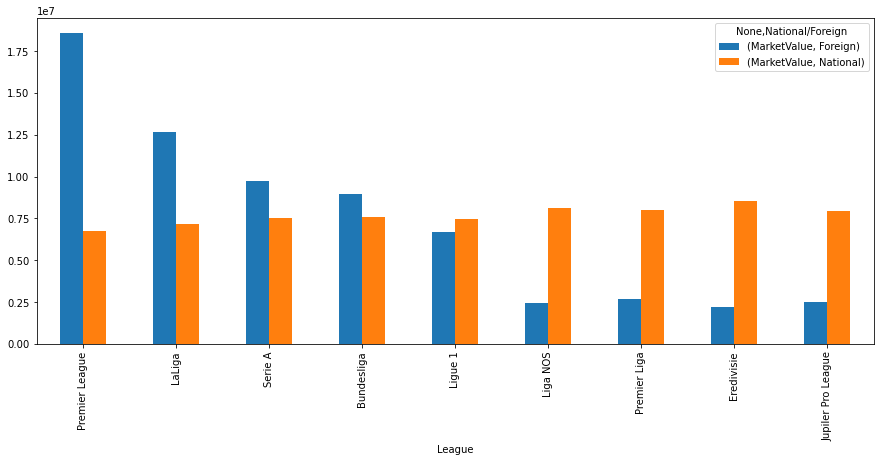

In [201]:
# Experiments with further combined data
order = ["Premier League","LaLiga","Serie A","Bundesliga","Ligue 1","Liga NOS","Premier Liga","Eredivisie","Jupiler Pro League"]
df_means.groupby(["League","National/Foreign"])[["MarketValue"]].sum().unstack().loc[order].plot(kind='bar')
plt.gcf().set_size_inches(15,6)
#plt.gfc().order=df_means.sort_values('MarketValue', ascending=False)
plt.show()

In [157]:
# We see that players in a number of leagues (Bundesliga, Seria A, La Liga, Premier League) are worth more if they have a foreign nationality. Interestingly enough, exactly those leagues are in total market value (see next) the highest.
# The conclusion for the Bundesliga to this can be: A player in the Bundesliga has a higher market value in average if he is not German. So non-german players perform better in terms of market value. 
# The implication to our soccer club: If we manage to transfer German players to other first league clubs in Italy, Spain or England it could be benefitial to its market value and we as a club should keep shares of a second trade.
# This is because the chances of a players market value increase compared to the german player being transfered within the Bundesliga or low marketvalue leagues (like Ligue 1, Liga NOS, Eredivision, Premier Liga) is more likely.

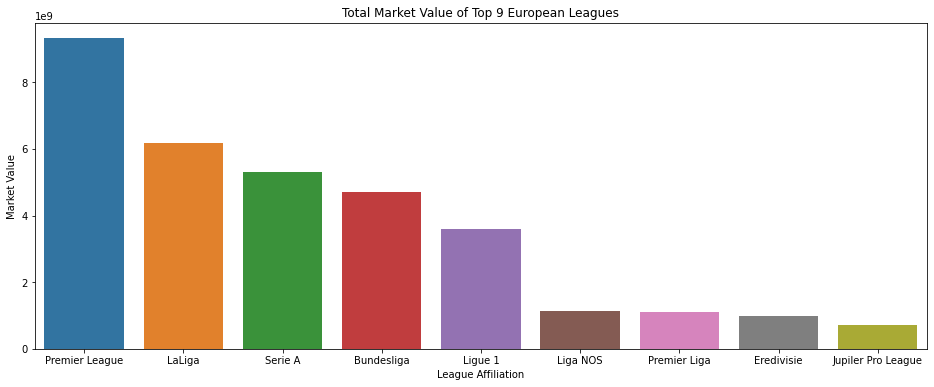

In [170]:
# Lets visualize this result in the context of the Soccer Leageus accumulated Market Values
df_league = df[['league', 'mv']].groupby(['league'], as_index=False).sum()
plt.figure(figsize=(16, 6))
league = sns.barplot(x="league", y="mv", data=df_league, order=df_league.sort_values('mv', ascending=False).league )
league.set(xlabel="League Affiliation", ylabel='Market Value',title='Total Market Value of Top 9 European Leagues')
plt.show()

In [ ]:
# It is very intersting and clear from the above, that foreign players are positively correlated with the overall market value of the league. 
# Meaning the higher the leagues net worth, the better perform foreign players in this league in terms of market value
# On the other hand, the average national players market value (a player with the same nationality as the league he plays in) is quite constant across the leagues and independent from their total market value.
# --> This, once again, supports the hypothesis that transfering local players from lower level leagues to the top 4 leagues can be benefitial for their market vvalue and hence a business opportunity for the club selling the player

**Analysis 2:  Is there a correlation between the height of players and their market value, maybe also in combination with their position?**